# ML3 - California Housing Predicition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Desktop\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Our goal is to predict the median house value by training a model to do so.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df = df.dropna()  # dropping null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Now we want to split our Dataset into a Train- and a Test split!

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']


In [6]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [7]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13643,-117.33,34.06,48.0,732.0,149.0,486.0,139.0,2.5673,INLAND,68200.0
10070,-120.19,39.32,16.0,1536.0,298.0,646.0,208.0,2.3594,INLAND,155700.0
10186,-117.95,33.87,35.0,1854.0,383.0,1115.0,381.0,4.4784,<1H OCEAN,185200.0
2367,-119.56,36.71,29.0,1963.0,392.0,1208.0,398.0,2.5741,INLAND,73000.0
9930,-122.33,38.29,14.0,3541.0,499.0,1577.0,459.0,5.3351,NEAR BAY,269900.0
...,...,...,...,...,...,...,...,...,...,...
5933,-117.82,34.13,27.0,3770.0,573.0,1606.0,562.0,6.1321,INLAND,309700.0
17432,-120.45,34.65,21.0,1182.0,243.0,733.0,251.0,3.1442,NEAR OCEAN,131600.0
15803,-122.44,37.76,35.0,1581.0,422.0,580.0,388.0,4.0500,NEAR BAY,423100.0
10883,-117.89,33.71,16.0,1591.0,225.0,926.0,239.0,6.2452,<1H OCEAN,266300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

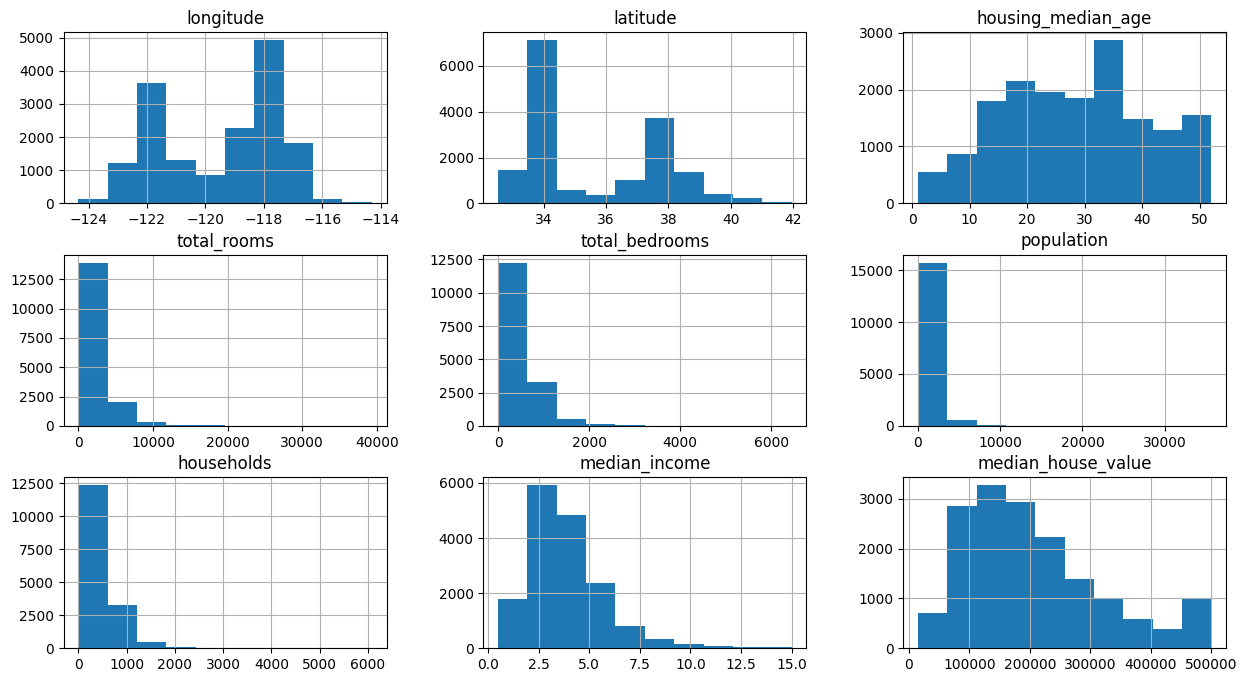

In [10]:
train_data.hist(figsize = (15, 8))

In [11]:
pre_onehot_enc = train_data.drop(['ocean_proximity'], axis=1).corr()
pre_onehot_enc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924407,-0.111986,0.043681,0.069567,0.098205,0.056250,-0.019781,-0.049369
latitude,-0.924407,1.000000,0.014024,-0.036082,-0.067771,-0.108311,-0.072577,-0.075065,-0.140972
housing_median_age,-0.111986,0.014024,1.000000,-0.359701,-0.320279,-0.293434,-0.301876,-0.121404,0.105247
total_rooms,0.043681,-0.036082,-0.359701,1.000000,0.931480,0.855828,0.918955,0.196739,0.132432
total_bedrooms,0.069567,-0.067771,-0.320279,0.931480,1.000000,0.876300,0.979675,-0.007632,0.049007
population,0.098205,-0.108311,-0.293434,0.855828,0.876300,1.000000,0.905614,0.002060,-0.027285
households,0.056250,-0.072577,-0.301876,0.918955,0.979675,0.905614,1.000000,0.012309,0.063475
median_income,-0.019781,-0.075065,-0.121404,0.196739,-0.007632,0.002060,0.012309,1.000000,0.688390
median_house_value,-0.049369,-0.140972,0.105247,0.132432,0.049007,-0.027285,0.063475,0.688390,1.000000


<Axes: >

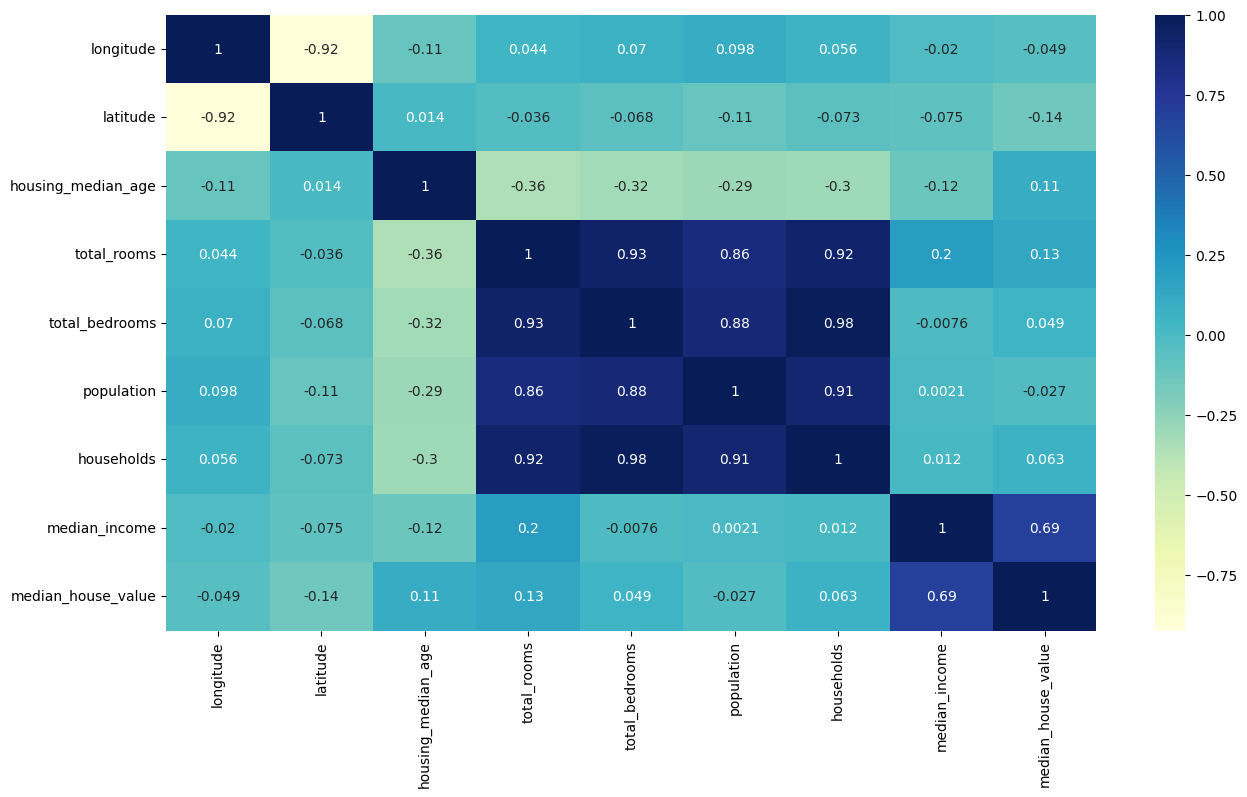

In [12]:
plt.figure(figsize = (15, 8))
sns.heatmap(pre_onehot_enc, annot=True, cmap='YlGnBu')

Since we saw in our histogram that our data is skewed, we can use a logarithmic scale to process the Data.

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

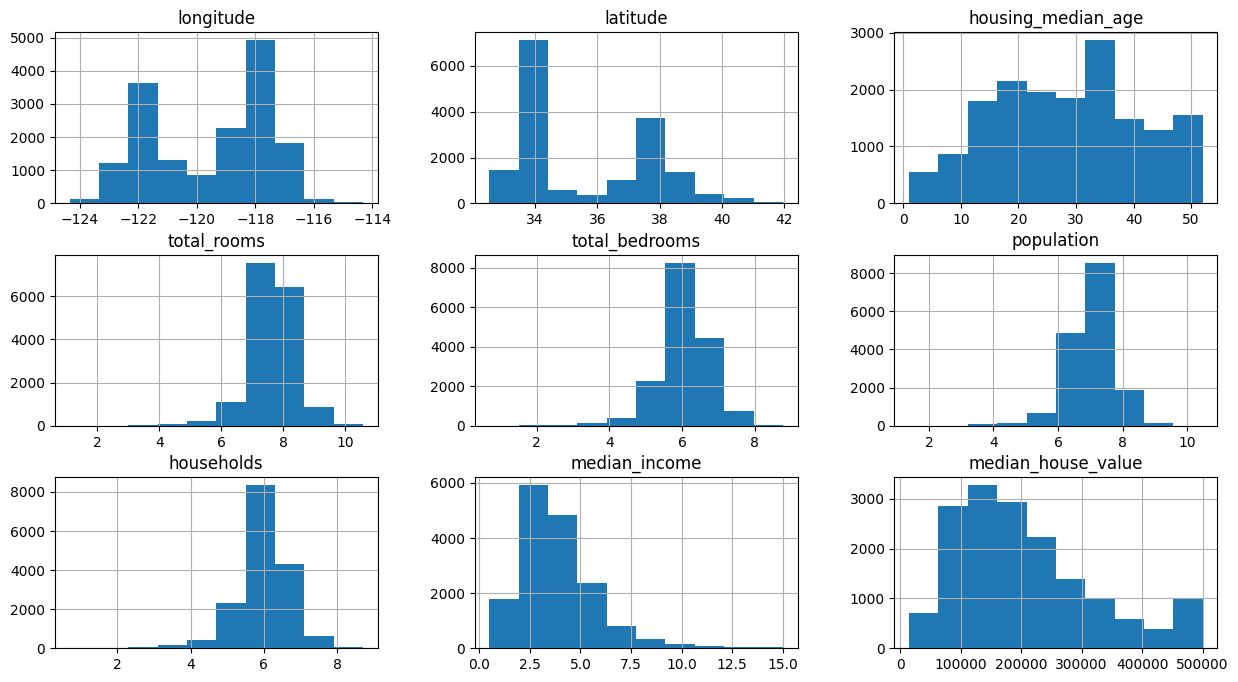

In [14]:
train_data.hist(figsize = (15, 8))

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13643,-117.33,34.06,48.0,6.597146,5.010635,6.188264,4.941642,2.5673,INLAND,68200.0
10070,-120.19,39.32,16.0,7.337588,5.700444,6.472346,5.342334,2.3594,INLAND,155700.0
10186,-117.95,33.87,35.0,7.525640,5.950643,7.017506,5.945421,4.4784,<1H OCEAN,185200.0
2367,-119.56,36.71,29.0,7.582738,5.973810,7.097549,5.988961,2.5741,INLAND,73000.0
9930,-122.33,38.29,14.0,8.172447,6.214608,7.363914,6.131226,5.3351,NEAR BAY,269900.0
...,...,...,...,...,...,...,...,...,...,...
5933,-117.82,34.13,27.0,8.235095,6.352629,7.382124,6.333280,6.1321,INLAND,309700.0
17432,-120.45,34.65,21.0,7.075809,5.497168,6.598509,5.529429,3.1442,NEAR OCEAN,131600.0
15803,-122.44,37.76,35.0,7.366445,6.047372,6.364751,5.963579,4.0500,NEAR BAY,423100.0
10883,-117.89,33.71,16.0,7.372746,5.420535,6.831954,5.480639,6.2452,<1H OCEAN,266300.0


## One hot Encoding on the ocean proximity

In [16]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7208
INLAND        5164
NEAR OCEAN    2146
NEAR BAY      1824
ISLAND           4
Name: count, dtype: int64

In [17]:
encoded_proximity = pd.get_dummies(train_data.ocean_proximity)
encoded_proximity

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13643,False,True,False,False,False
10070,False,True,False,False,False
10186,True,False,False,False,False
2367,False,True,False,False,False
9930,False,False,False,True,False
...,...,...,...,...,...
5933,False,True,False,False,False
17432,False,False,False,False,True
15803,False,False,False,True,False
10883,True,False,False,False,False


In [18]:
train_data = train_data.join(encoded_proximity)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13643,-117.33,34.06,48.0,6.597146,5.010635,6.188264,4.941642,2.5673,INLAND,68200.0,False,True,False,False,False
10070,-120.19,39.32,16.0,7.337588,5.700444,6.472346,5.342334,2.3594,INLAND,155700.0,False,True,False,False,False
10186,-117.95,33.87,35.0,7.525640,5.950643,7.017506,5.945421,4.4784,<1H OCEAN,185200.0,True,False,False,False,False
2367,-119.56,36.71,29.0,7.582738,5.973810,7.097549,5.988961,2.5741,INLAND,73000.0,False,True,False,False,False
9930,-122.33,38.29,14.0,8.172447,6.214608,7.363914,6.131226,5.3351,NEAR BAY,269900.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,-117.82,34.13,27.0,8.235095,6.352629,7.382124,6.333280,6.1321,INLAND,309700.0,False,True,False,False,False
17432,-120.45,34.65,21.0,7.075809,5.497168,6.598509,5.529429,3.1442,NEAR OCEAN,131600.0,False,False,False,False,True
15803,-122.44,37.76,35.0,7.366445,6.047372,6.364751,5.963579,4.0500,NEAR BAY,423100.0,False,False,False,True,False
10883,-117.89,33.71,16.0,7.372746,5.420535,6.831954,5.480639,6.2452,<1H OCEAN,266300.0,True,False,False,False,False


In [19]:
train_data = train_data.drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13643,-117.33,34.06,48.0,6.597146,5.010635,6.188264,4.941642,2.5673,68200.0,False,True,False,False,False
10070,-120.19,39.32,16.0,7.337588,5.700444,6.472346,5.342334,2.3594,155700.0,False,True,False,False,False
10186,-117.95,33.87,35.0,7.525640,5.950643,7.017506,5.945421,4.4784,185200.0,True,False,False,False,False
2367,-119.56,36.71,29.0,7.582738,5.973810,7.097549,5.988961,2.5741,73000.0,False,True,False,False,False
9930,-122.33,38.29,14.0,8.172447,6.214608,7.363914,6.131226,5.3351,269900.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,-117.82,34.13,27.0,8.235095,6.352629,7.382124,6.333280,6.1321,309700.0,False,True,False,False,False
17432,-120.45,34.65,21.0,7.075809,5.497168,6.598509,5.529429,3.1442,131600.0,False,False,False,False,True
15803,-122.44,37.76,35.0,7.366445,6.047372,6.364751,5.963579,4.0500,423100.0,False,False,False,True,False
10883,-117.89,33.71,16.0,7.372746,5.420535,6.831954,5.480639,6.2452,266300.0,True,False,False,False,False


Just like that, we encoded the non numerical values so they can be used for training the model!

<Axes: >

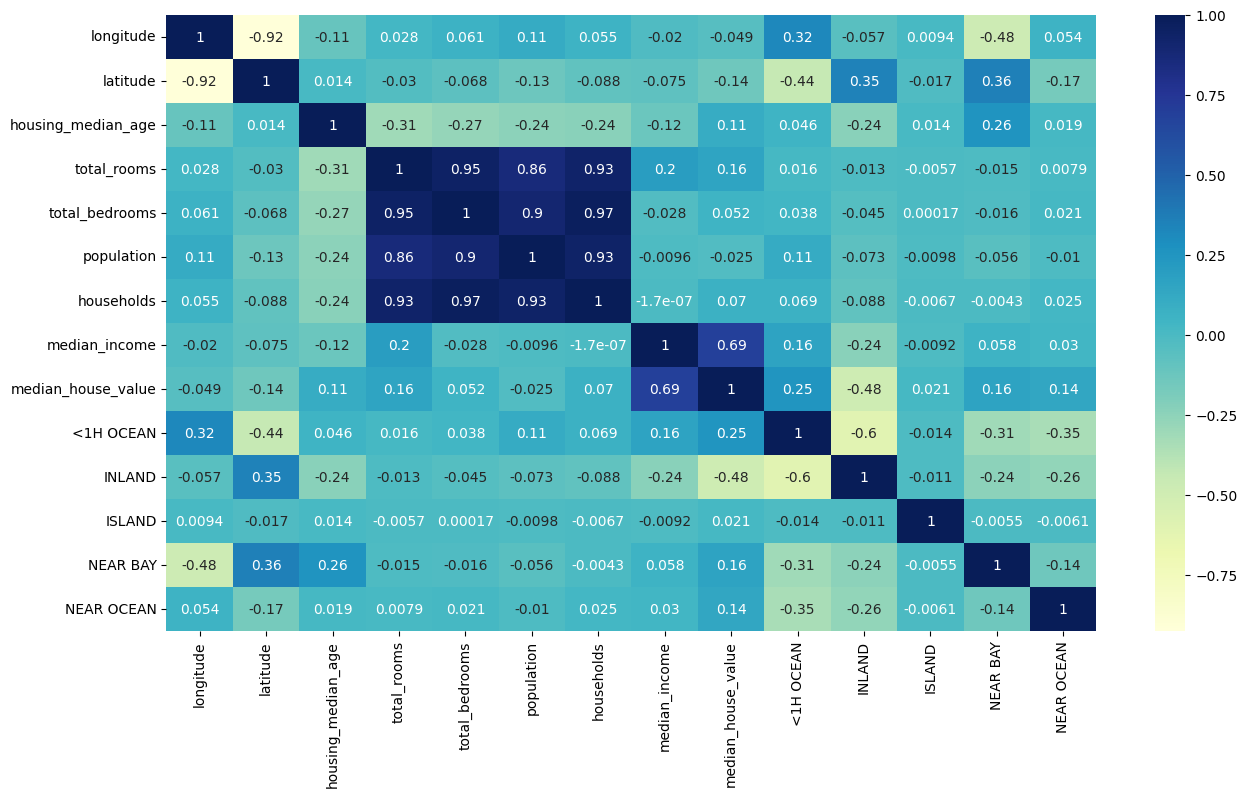

In [20]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

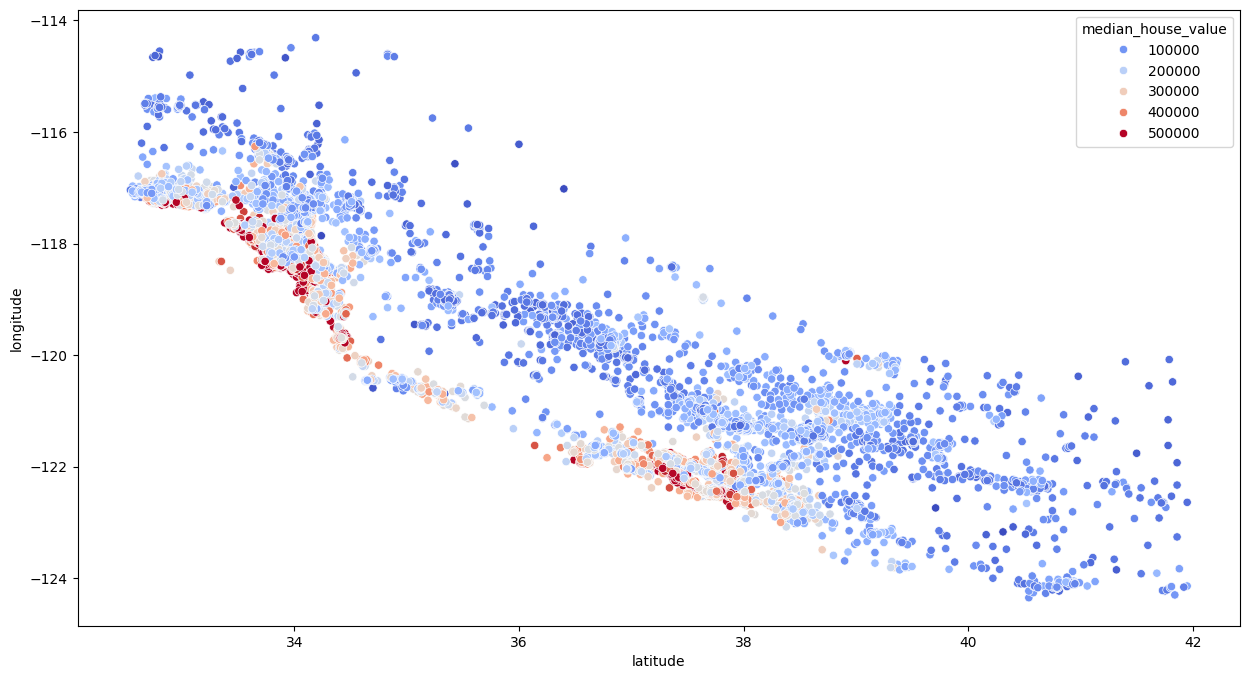

In [21]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

Through the ```latitude``` and ```longitude``` we can clearly see where the coastal or 'near sea' houses are located and how the median price correlates with it!

In [22]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<Axes: >

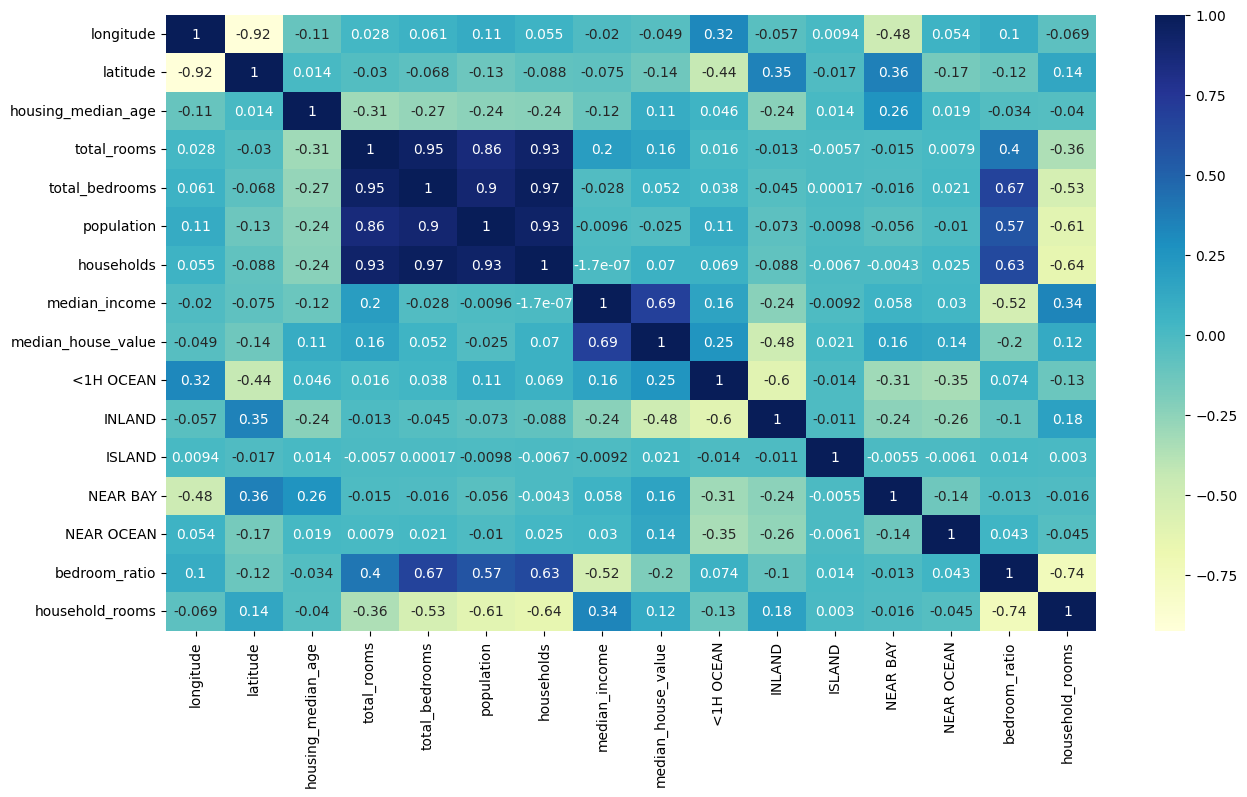

In [23]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [25]:
test_data = X_test.join(y_test)

encoded_proximity_test = pd.get_dummies(test_data.ocean_proximity)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(encoded_proximity_test)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

test_data = test_data.drop(['ocean_proximity'], axis = 1)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10148,-117.92,33.91,27.0,7.847372,5.739793,6.793466,5.758902,9.5561,411800.0,True,False,False,False,False,0.731429,1.362651
6608,-118.14,34.19,49.0,7.425954,5.627621,6.603944,5.662960,3.7222,237000.0,False,True,False,False,False,0.757831,1.311320
17002,-122.25,37.56,19.0,8.984318,7.249215,8.142645,7.199678,5.6396,430300.0,False,False,False,True,False,0.806874,1.247878
7153,-118.15,34.03,44.0,6.403574,5.337538,6.378426,5.389072,2.0536,186400.0,True,False,False,False,False,0.833525,1.188252
13633,-117.34,34.08,35.0,7.230563,5.517453,6.594413,5.579730,3.2305,93700.0,False,True,False,False,False,0.763074,1.295863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,-122.50,37.77,52.0,7.797291,6.120297,6.976348,6.042633,4.1250,359500.0,False,False,False,True,False,0.784926,1.290380
8133,-118.12,33.82,43.0,7.342779,5.659482,6.553933,5.700444,4.1375,226000.0,True,False,False,False,False,0.770755,1.288107
1126,-121.60,39.77,23.0,7.724888,6.210600,7.037906,6.122493,2.3403,87300.0,False,True,False,False,False,0.803973,1.261723
11838,-120.98,39.93,25.0,7.705713,6.238325,6.816736,6.109248,1.8914,87800.0,False,True,False,False,False,0.809571,1.261319


In [26]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10148,-117.92,33.91,27.0,7.847372,5.739793,6.793466,5.758902,9.5561,True,False,False,False,False,0.731429,1.362651
6608,-118.14,34.19,49.0,7.425954,5.627621,6.603944,5.662960,3.7222,False,True,False,False,False,0.757831,1.311320
17002,-122.25,37.56,19.0,8.984318,7.249215,8.142645,7.199678,5.6396,False,False,False,True,False,0.806874,1.247878
7153,-118.15,34.03,44.0,6.403574,5.337538,6.378426,5.389072,2.0536,True,False,False,False,False,0.833525,1.188252
13633,-117.34,34.08,35.0,7.230563,5.517453,6.594413,5.579730,3.2305,False,True,False,False,False,0.763074,1.295863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,-122.50,37.77,52.0,7.797291,6.120297,6.976348,6.042633,4.1250,False,False,False,True,False,0.784926,1.290380
8133,-118.12,33.82,43.0,7.342779,5.659482,6.553933,5.700444,4.1375,True,False,False,False,False,0.770755,1.288107
1126,-121.60,39.77,23.0,7.724888,6.210600,7.037906,6.122493,2.3403,False,True,False,False,False,0.803973,1.261723
11838,-120.98,39.93,25.0,7.705713,6.238325,6.816736,6.109248,1.8914,False,True,False,False,False,0.809571,1.261319


In [27]:
reg.score(X_test, y_test)

0.665792709096941

In [29]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_s = scaler.fit_transform(X_train)

# Fit the regression model on the scaled training data
reg.fit(X_train_s, y_train)

# Transform the test data using the same scaler
X_test_s = scaler.transform(X_test)

# Score the regression model on the scaled test data
score = reg.score(X_test_s, y_test)

# Print the score
print(score)

0.665792709096941


In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
forest.score(X_test, y_test)

0.8206215185239231

In [32]:
forest.fit(X_train_s, y_train)
forest.score(X_test_s, y_test)

0.8200842263790682

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
best_forest = grid_search.best_estimator_

In [42]:
best_forest.score(X_test_s, y_test)

0.8117335392837074

In this case, the finetuning got us worse results.Good thing this was just for the sake of practicing! :D